## Computational Drug Discovery
##### In this project, we will perform drug discovery with the help of Python programming. In the course of this project, we will discuss crucial findings.  For this, we will take the data from the ChEMBL database. The activity of the compound will be determined based on their IC50 values.
##### ChEMBLdb or ChEMBL is a chemical database of bioactive molecules that have drug-like properties. It is maintained by the European Bioinformatics Institute, of the European Molecular Biology Laboratory (EMBL), based at the Hinxton, UK.
##### IC50 is the concentration or amount of an inhibitor/drug where the response is reduced by half.

##### Install ChEMBL library

In [2]:
! pip install chembl_webresource_client

##### Import libraries

In [4]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

#### Now let's search for protein that can target Coronavirus

In [5]:
target_search = new_client.target
target_query = target_search.search('coronavirus')
target_result = pd.DataFrame.from_dict(target_query)
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


##### Let's try to find the and retrieve bioactivity data for 5th entry (4th in number) SARS coronavirus 3C-like proteinase

In [6]:
target_result['organism']

0                                          Coronavirus
1                                     SARS coronavirus
2                                   Feline coronavirus
3                               Human coronavirus 229E
4                                     SARS coronavirus
5    Middle East respiratory syndrome-related coron...
6                                     SARS coronavirus
7      Severe acute respiratory syndrome coronavirus 2
Name: organism, dtype: object

##### Let se the details of 5th entry by iloc (iloc helps in select ing a value that belongs to a particular row or column)

In [7]:
target_result.iloc[4]

cross_references      [{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...
organism                                               SARS coronavirus
pref_name                           SARS coronavirus 3C-like proteinase
score                                                                10
species_group_flag                                                False
target_chembl_id                                             CHEMBL3927
target_components     [{'accession': 'P0C6U8', 'component_descriptio...
target_type                                              SINGLE PROTEIN
tax_id                                                           227859
Name: 4, dtype: object

#### Assign the entry to the "selected_target" variable 

In [8]:
target_selected = target_result.target_chembl_id[4]
target_selected

'CHEMBL3927'

##### Let's retrieve bioactivity data for coronavirus 3C-like proteinase (CHEMBL3927) that are reported as IC50 values (in nM)

In [9]:
bioactivity = new_client.activity
result = bioactivity.filter(target_chembl_id=target_selected).filter(standard_type="IC50")

In [10]:
df = pd.DataFrame.from_dict(result)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0


#### Let's save the bioactivity data to a CSV file bioactivity_data.csv

In [11]:
df.to_csv('bioactivity_data.csv', index=False)

### Let's find the missing data and will handle (drop) it

In [12]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


##### Looks like there is no missing data

### Data pre-processing of the bioactivity determination
##### Based on IC50 we will label compound either active, inactive or intermediate
###### Again: IC50 is the concentration or amount of an inhibitor/drug where the response is reduced by half
Active   = IC50 less than 1000 nM,
Inactive = IC50 greater than 10,000 nM,
Intermediate = IC50 between 1,000 and 10,000 nM

In [13]:
bioactivity_determination = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_determination.append("Inactive")
  elif float(i) <= 1000:
    bioactivity_determination.append("Active")
  else:
    bioactivity_determination.append("intermediate")

### Let's combine the 3 columns (molecule_chembl_id, canonical_smiles, standard_value) and bioactivity_class into a DataFrame
#### See the DataFrame

In [14]:
selected = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selected]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0


#### Add bioactivity determination by creating another DataFrame

In [16]:
bioactivity_determination = pd.Series(bioactivity_determination, name='bioactivity_determination')
df4 = pd.concat([df3, bioactivity_determination], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_determination
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,Inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,Inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,Inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,Inactive


#### Let's save the dataframe to CSV file

In [17]:
df4.to_csv('bioactivity_data_final.csv', index=False)

## Now let's do some Exploratory Data Analysis

#### Import the data

In [19]:
df = pd.read_csv ("C:/Users/--/bioactivity_data_final.csv")
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_determination
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate


#### Calculate Lipinski descriptors  to evaluate druglikeness
The rule was formulated by Christopher A. Lipinski in 1997
For evaluating the druglikeness of compounds based on the Absorption, Distribution, Metabolism and Excretion (ADME) (pharmacokinetic profile). However, the rule does not predict if a compound is pharmacologically active. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule that stated the following:
. Molecular weight < 500 Dalton
. Octanol-water partition coefficient (LogP) < 5
. Hydrogen bond donors < 5
. Hydrogen bond acceptors < 10

In [20]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [21]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [22]:
df_lipinski = lipinski(df.canonical_smiles)

#### Let's Combine DataFrames
Take a look at the 2 DataFrames that will be combined.

In [24]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_determination
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate


In [25]:
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0


#### Now, let's combine these 2 DataFrame

In [27]:
combined_df = pd.concat([df,df_lipinski], axis=1)
combined_df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_determination,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0


#### Convert IC50 to pIC50
To make IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale (-log10(IC50)).

This custom function pIC50() will accept a DataFrame as input and will:
Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9 
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [28]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # to converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

##### Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [29]:
combined_df.standard_value.describe()

count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

In [30]:
-np.log10( (10**-9)* 100000000 )

1.0

In [31]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [32]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

#### Now We will apply the norm_value() function to normaliza the values in the standard_value column 

In [34]:
df_norml = norm_value(combined_df)
df_norml.head()

,molecule_chembl_id,canonical_smiles,bioactivity_determination,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0


In [36]:
df_norml.standard_value_norm.describe()

count    1.330000e+02
mean     2.110164e+07
std      4.089714e+07
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [38]:
df_final = pIC50(df_norml)
df_final.head()

,molecule_chembl_id,canonical_smiles,bioactivity_determination,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970


In [39]:
df_final.pIC50.describe()

count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64

#### Let's remove the intermediate bioactivity class from our data set.

In [42]:
df_2class = df_final[df_final.bioactivity_determination != 'intermediate']
df_2class.head()

,molecule_chembl_id,canonical_smiles,bioactivity_determination,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.6605,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.6308,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,Active,372.243,4.3933,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,Active,419.243,4.2354,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,Inactive,327.792,4.2842,0.0,3.0,4.950782


#### Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

##### Import libraries

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

##### Frequency plot of the 2 bioactivity classes

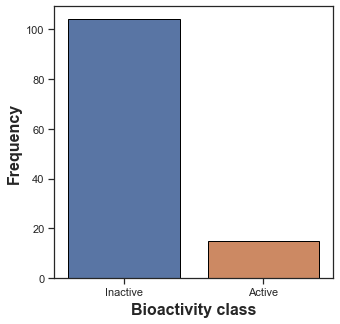

In [48]:
plt.figure(figsize=(5, 5))

sns.countplot(x='bioactivity_determination', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

#### Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

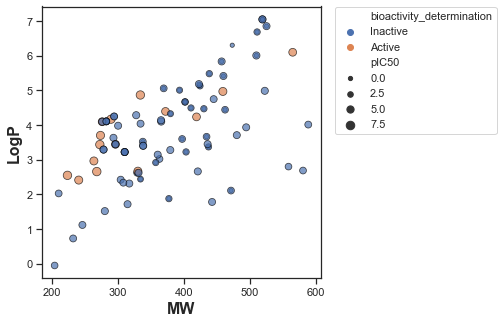

In [49]:
plt.figure(figsize=(5, 5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_determination', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=16, fontweight='bold')
plt.ylabel('LogP', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

#### Box plots
pIC50 value

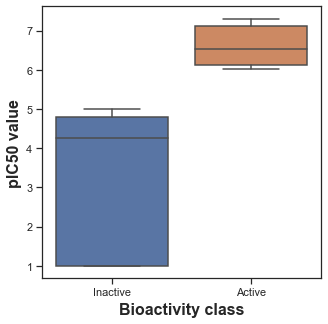

In [50]:
plt.figure(figsize=(5, 5))

sns.boxplot(x = 'bioactivity_determination', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=16, fontweight='bold')

plt.savefig('plot_ic50.pdf')

#### Statistical analysis | Mann-Whitney U Test

In [53]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_determination']
  df = df_2class[selection]
  active = df[df.bioactivity_determination == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_determination']
  df = df_2class[selection]
  inactive = df[df.bioactivity_determination == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [54]:
mannwhitney('pIC50')

C:\Users\--\ANACONDA\lib\site-packages\scipy\stats\stats.py:5700: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


#### MW

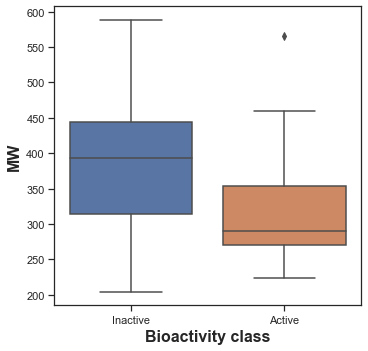

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_determination', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('MW', fontsize=16, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [56]:
mannwhitney('MW')

C:\Users\--\ANACONDA\lib\site-packages\scipy\stats\stats.py:5700: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,0.0,0.0,0.05,Different distribution (reject H0)


#### LogP

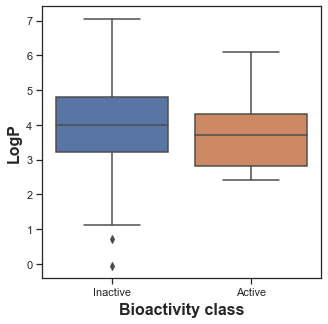

In [57]:
plt.figure(figsize=(5, 5))

sns.boxplot(x = 'bioactivity_determination', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('LogP', fontsize=16, fontweight='bold')

plt.savefig('plot_LogP.pdf')

#### Statistical analysis | Mann-Whitney U Test

In [58]:
mannwhitney('LogP')

C:\Users\--\ANACONDA\lib\site-packages\scipy\stats\stats.py:5700: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,0.0,0.0,0.05,Different distribution (reject H0)


#### Numner of H Donors

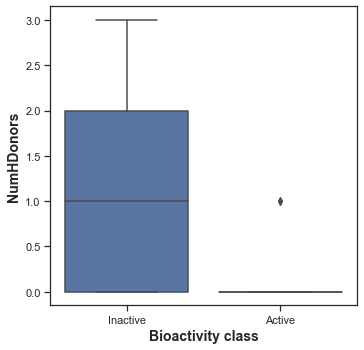

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_determination', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

#### Statistical analysis | Mann-Whitney U Test

In [60]:
mannwhitney('NumHDonors')

C:\Users\--\ANACONDA\lib\site-packages\scipy\stats\stats.py:5700: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,0.0,0.0,0.05,Different distribution (reject H0)


#### Number of H acceptors

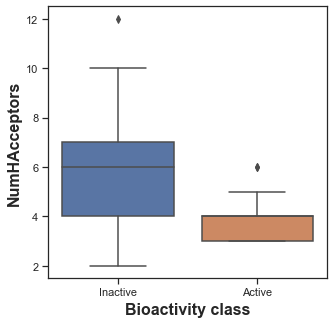

In [61]:
plt.figure(figsize=(5, 5))

sns.boxplot(x = 'bioactivity_determination', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=16, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=16, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

#### Statistical analysis | Mann-Whitney U Test

In [62]:
mannwhitney('NumHAcceptors')

C:\Users\--\ANACONDA\lib\site-packages\scipy\stats\stats.py:5700: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,0.0,0.0,0.05,Different distribution (reject H0)


### Interpretation of Statistical Results
#### Box Plots
##### pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactive compounds.

#### Lipinski's descriptors
Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited no difference between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows statistically significant difference between actives and inactives.